In [42]:
#imports
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import plotly.io as pio
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#importing datasets
music_data = pd.read_csv("music_genre.csv")
df = music_data.copy(deep=True)

#makes theme dark for all ploty visuals
pio.templates.default = "plotly_dark"





#dropping irrelevent columns
badInfo = ["instance_id","obtained_date","artist_name","track_name"]
df.drop(columns=badInfo,axis=1,inplace=True)

#dropping null rows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) #Very good practice to reset how your rows are counted when you drop rows.

#fixing tempo
df["tempo"]=df["tempo"].replace("?",np.nan)
df["tempo"] = df["tempo"].astype("float")
df["tempo"]=df.groupby("music_genre")["tempo"].transform(lambda x: x.fillna(x.mean(skipna=True)))

#fixing duration
df["duration_ms"]=df["duration_ms"].replace(-1.0,np.nan)
df["duration_ms"]=df.groupby("music_genre")["duration_ms"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['duration_ms'] = np.around(df['duration_ms'],2)

In [43]:
'''
#creating dummy variables for categorical variables
dummies = pd.get_dummies(df["key"])
df["A"] = dummies["A"]
df["B"] = dummies["B"]
df["C"] = dummies["C"]
df["D"] = dummies["D"]
df["E"] = dummies["E"]
df["F"] = dummies["F"]
df["G"] = dummies["G"]
df["A#"] = dummies["A#"]
df["C#"] = dummies["C#"]
df["D#"] = dummies["D#"]
df["F#"] = dummies["F#"]
df["G#"] = dummies["G#"]
df.drop("key", axis = 1, inplace = True)

dummies = pd.get_dummies(df["mode"])
df["Major"] = dummies["Major"]
df["Minor"] = dummies["Minor"]
df.drop("mode", axis = 1, inplace = True)

dummies = pd.get_dummies(df["music_genre"])
df["Electronic"] = dummies["Electronic"]
df["Anime"] = dummies["Anime"]
df["Jazz"] = dummies["Jazz"]
df["Alternative"] = dummies["Alternative"]
df["Country"] = dummies["Country"]
df["Rap"] = dummies["Rap"]
df["Blues"] = dummies["Blues"]
df["Rock"] = dummies["Rock"]
df["Classical"] = dummies["Classical"]
df["Hip-Hop"] = dummies["Hip-Hop"]
df.drop("music_genre", axis = 1, inplace = True)
df.head()
'''


#This function replaces labels, such as Jazz, Rock, Rap, etc. with numbers. Each label now carries it's own number

def stringToInt(dataFrame,col):
    test = {}
    for i in dict(enumerate(dataFrame[col].unique())).items():#is a dictionary of the keys and corespodening number
        #makes it so the keys and values of the dictionary switch
        test[i[1]]=i[0]
    print(test,'\n')
    return dataFrame[col].map(test)

def getScore(y_test,y_hat):
    labels = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']
    print((np.sum((y_test - y_hat)**2))/len(y_test) )#mean squared error
    print(classification_report(y_test, y_hat,target_names=[i+":" for i in labels]))#getting dataframe
df = pd.read_csv("music_genre.csv")

#dropping columns
badInfo = ["instance_id","obtained_date","artist_name","track_name"]
df.drop(columns=badInfo,axis=1,inplace=True)

#dropping null rows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) #Very good practice to reset how your rows are counted when you drop rows.

#fixing the problem with 'tempo' column
df["tempo"]=df["tempo"].replace("?",np.nan)
df["tempo"] = df["tempo"].astype("float")
df["tempo"]=df.groupby("music_genre")["tempo"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['tempo'] = np.around(df['tempo'],2)

#fixing the problem with 'duration' column
df["duration_ms"]=df["duration_ms"].replace(-1.0,np.nan)
df["duration_ms"]=df.groupby("music_genre")["duration_ms"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['duration_ms'] = np.around(df['duration_ms'],2)

#changing the values from string to int
df['key'] = stringToInt(df,'key')
df['mode'] = stringToInt(df,'mode')
df['music_genre_name'] = df['music_genre']
df['music_genre'] = stringToInt(df,'music_genre')

pio.templates.default = "plotly_dark"

#dfxg = copy.deepcopy(df)

#Setting X to be all the input columns 
X = df.loc[:,df.columns[:-2]]


#Setting y to be the desired column
y= df['music_genre']#what we want

#Splitting test and train ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scaling X variables
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#for heat map
labels = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']

{'A#': 0, 'D': 1, 'G#': 2, 'C#': 3, 'F#': 4, 'B': 5, 'G': 6, 'F': 7, 'A': 8, 'C': 9, 'E': 10, 'D#': 11} 

{'Minor': 0, 'Major': 1} 

{'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3, 'Country': 4, 'Rap': 5, 'Blues': 6, 'Rock': 7, 'Classical': 8, 'Hip-Hop': 9} 



In [44]:
# genre_list = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']
# # target = pd.get_dummies(dummies)
# # input_columns = df.iloc[:,:-10]
# # x_train, x_test, y_train, y_test = train_test_split(input_columns, target, train_size=0.8)
# # scaler = preprocessing.StandardScaler().fit(x_train)
# # x_train_scaled = scaler.transform(x_train)
# # x_test_scaled = scaler.transform(x_test)

# #use_label_encoder=False, eval_metric='mlogloss'
# #booster='gbtree', max_depth=4, subsample=.5, gamma= 4, colsample_bytree=.5
# model = XGBClassifier()
# model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
# model_gs.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=0)
# print(model_gs.best_params_)
# #model.fit(x_train_scaled, y_train)




estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 2,
    verbose=True
)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

'''
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train).predict(X_test)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy: ", accuracy)

total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

#confusion matrix
labels = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']
# sns.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
getScore(y_test,y_pred)
'''

Fitting 2 folds for each of 96 candidates, totalling 192 fits


In [2]:
print(grid_search.best_estimator_)

NameError: name 'grid_search' is not defined

<AxesSubplot:>

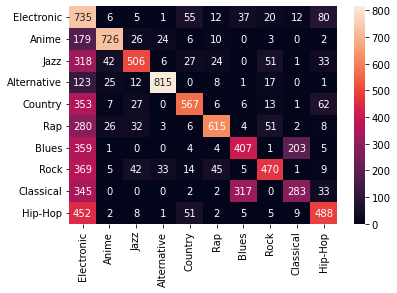

In [26]:
labels = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']
sns.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, fmt='g', xticklabels=labels, yticklabels=labels)